In [ ]:
# Import des bibliothèques nécessaires
import torch
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import numpy as np

In [ ]:
# Fonction pour effectuer la réduction de dimension avec t-SNE
def perform_tsne(data, n_components):
    tsne_model = TSNE(n_components=n_components, random_state=42)
    tsne_result = tsne_model.fit_transform(data)
    return tsne_result

In [ ]:
# Fonction pour effectuer le clustering avec k-means
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(data)
    return pred

In [ ]:
# Fonction pour évaluer les résultats du clustering
def evaluate_clustering(true_labels, pred_labels):
    nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
    ari_score = adjusted_rand_score(true_labels, pred_labels)
    return nmi_score, ari_score

In [ ]:
# Import des données NG20
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))
print(k)

20


In [ ]:
print(k)

20


In [ ]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# Chargement du modèle Sentence Transformer (par exemple, 'paraphrase-MiniLM-L6-v2' est un bon choix)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [ ]:
# Réduction de dimension avec t-SNE
tsne_result = perform_tsne(embeddings, 2)

In [ ]:
# Clustering avec k-means
pred_labels = perform_kmeans(tsne_result, 20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Évaluation des résultats du clustering
nmi_score, ari_score = evaluate_clustering(labels, pred_labels)

# Affichage des résultats
print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.40 
ARI: 0.21


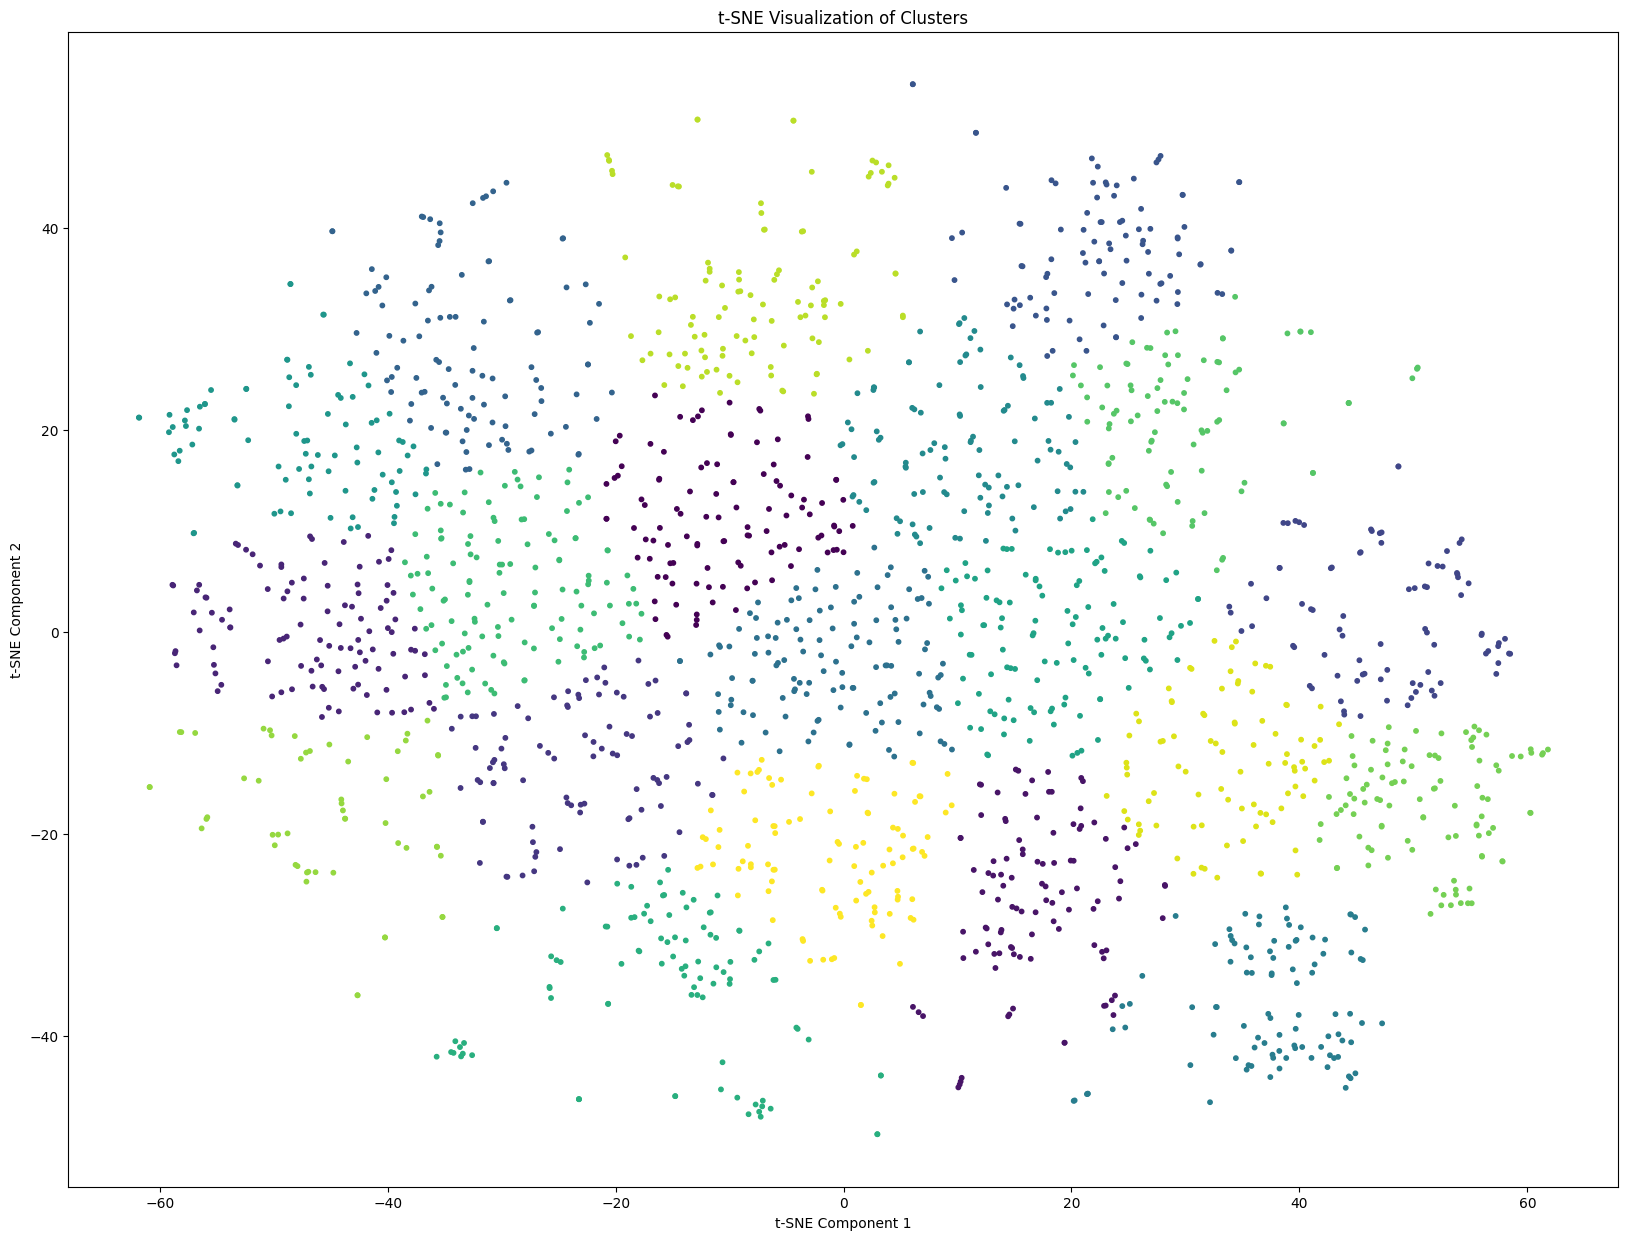

In [ ]:
import matplotlib.pyplot as plt

# Plot the data points with different colors for each cluster
plt.figure(figsize=(20, 15))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=pred_labels, cmap='viridis', s=10)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# # Manually specify colors and labels for legend
# unique_labels = np.unique(labels)
# num_classes = len(unique_labels)
# legend_colors = plt.cm.viridis(np.linspace(0, 1, num_classes))
# legend_labels = unique_labels.tolist()

# # Add legend
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()